<a href="https://colab.research.google.com/github/bhupeshks21/projects/blob/main/Project_Bhupesh_210271.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Summary:
Number of observations: 75
Time range: 1.0 to 75.0
y range: 0.969 to 4.503
y mean: 1.879, std: 0.557

FITTING MODEL 3: POLYNOMIAL REGRESSION
Parameters: β0=3.7683, β1=-0.2642, β2=0.0115, β3=-0.0002, β4=0.0000
Sum of Squared Residuals: 12.6976
Mean Squared Error: 0.1693
R²: 0.4545

FITTING MODEL 1: DOUBLE EXPONENTIAL
Parameters: α0=1.5822, α1=0.2990, β1=-0.0121, α2=4.5055, β2=-0.4668
Sum of Squared Residuals: 9.2721
Mean Squared Error: 0.1236
R²: 0.6016

FITTING MODEL 2: RATIONAL FUNCTION
Parameters: α0=3.6833, α1=1.3548, β0=0.2495, β1=0.8256
Sum of Squared Residuals: 9.9245
Mean Squared Error: 0.1323
R²: 0.5736

MODEL COMPARISON
Model 1 (Double Exponential): SSR = 9.2721
Model 2 (Rational Function): SSR = 9.9245
Model 3 (Polynomial): SSR = 12.6976

BEST MODEL: Model 1 (Double Exponential)

Estimate of σ²: 0.1325

CONFIDENCE INTERVALS FOR Model 1 (Double Exponential)
α0: 1.5822 ± 1.8943 (95% CI: [-2.1959, 5.3603])
α1: 0.2990 ± 1.6702 (95% CI: [-3.0320, 3.6300])
β1: -0.0121

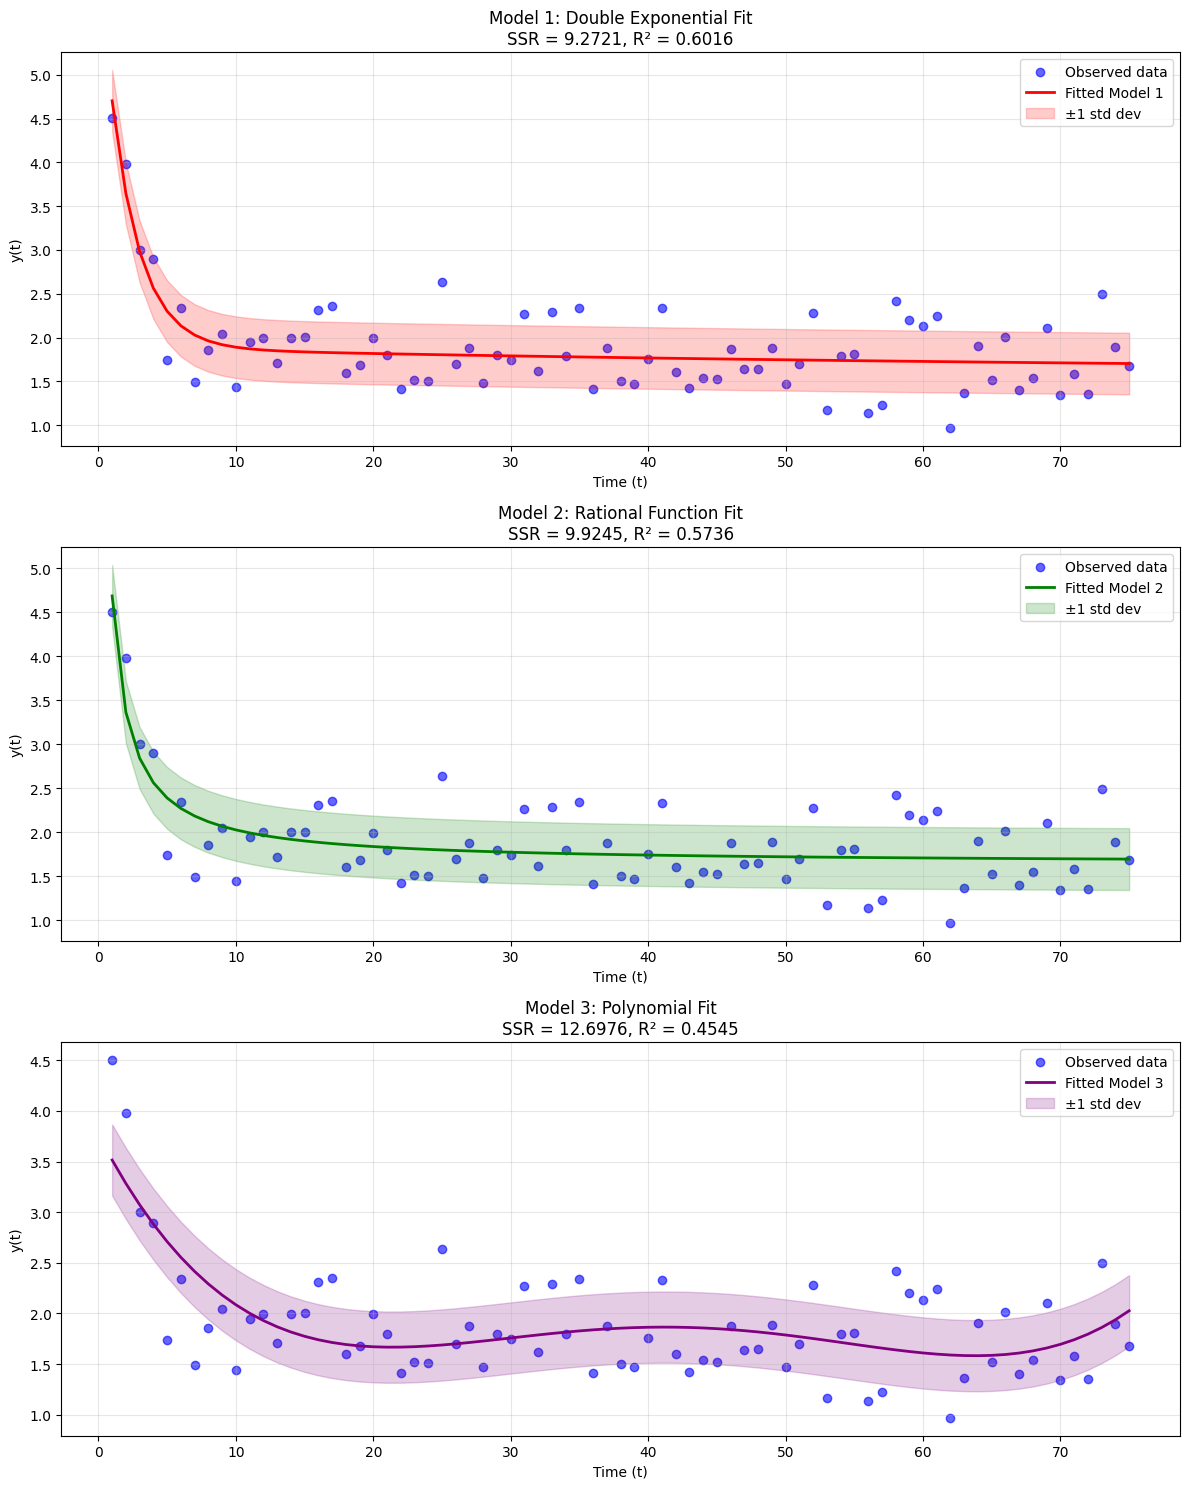


Generating model comparison plot...


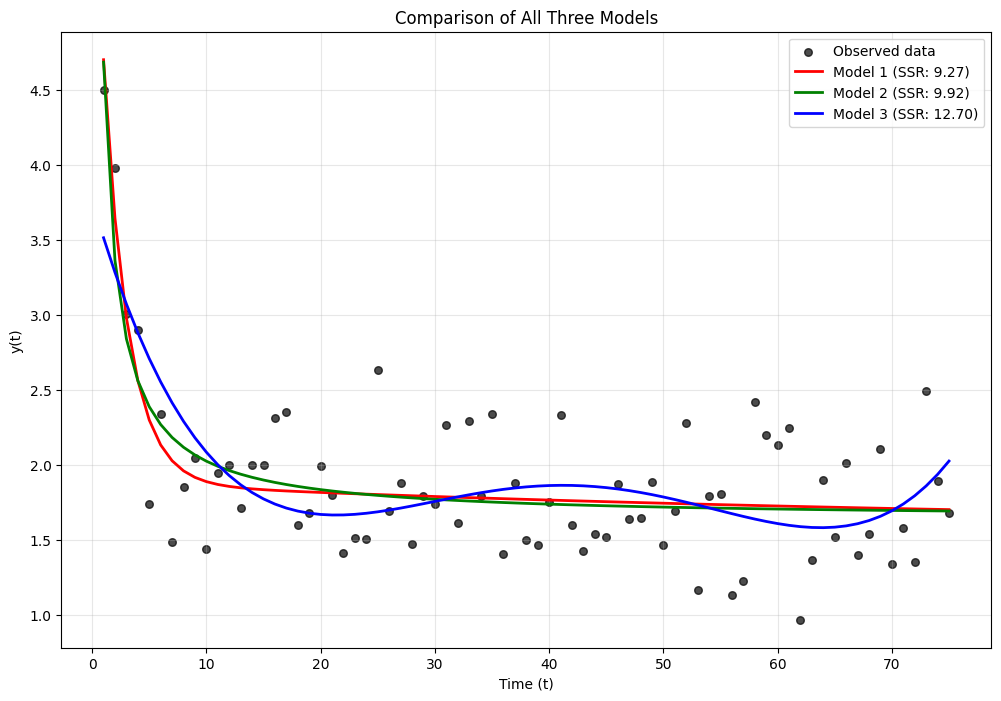


Generating residuals analysis with Q-Q plot...


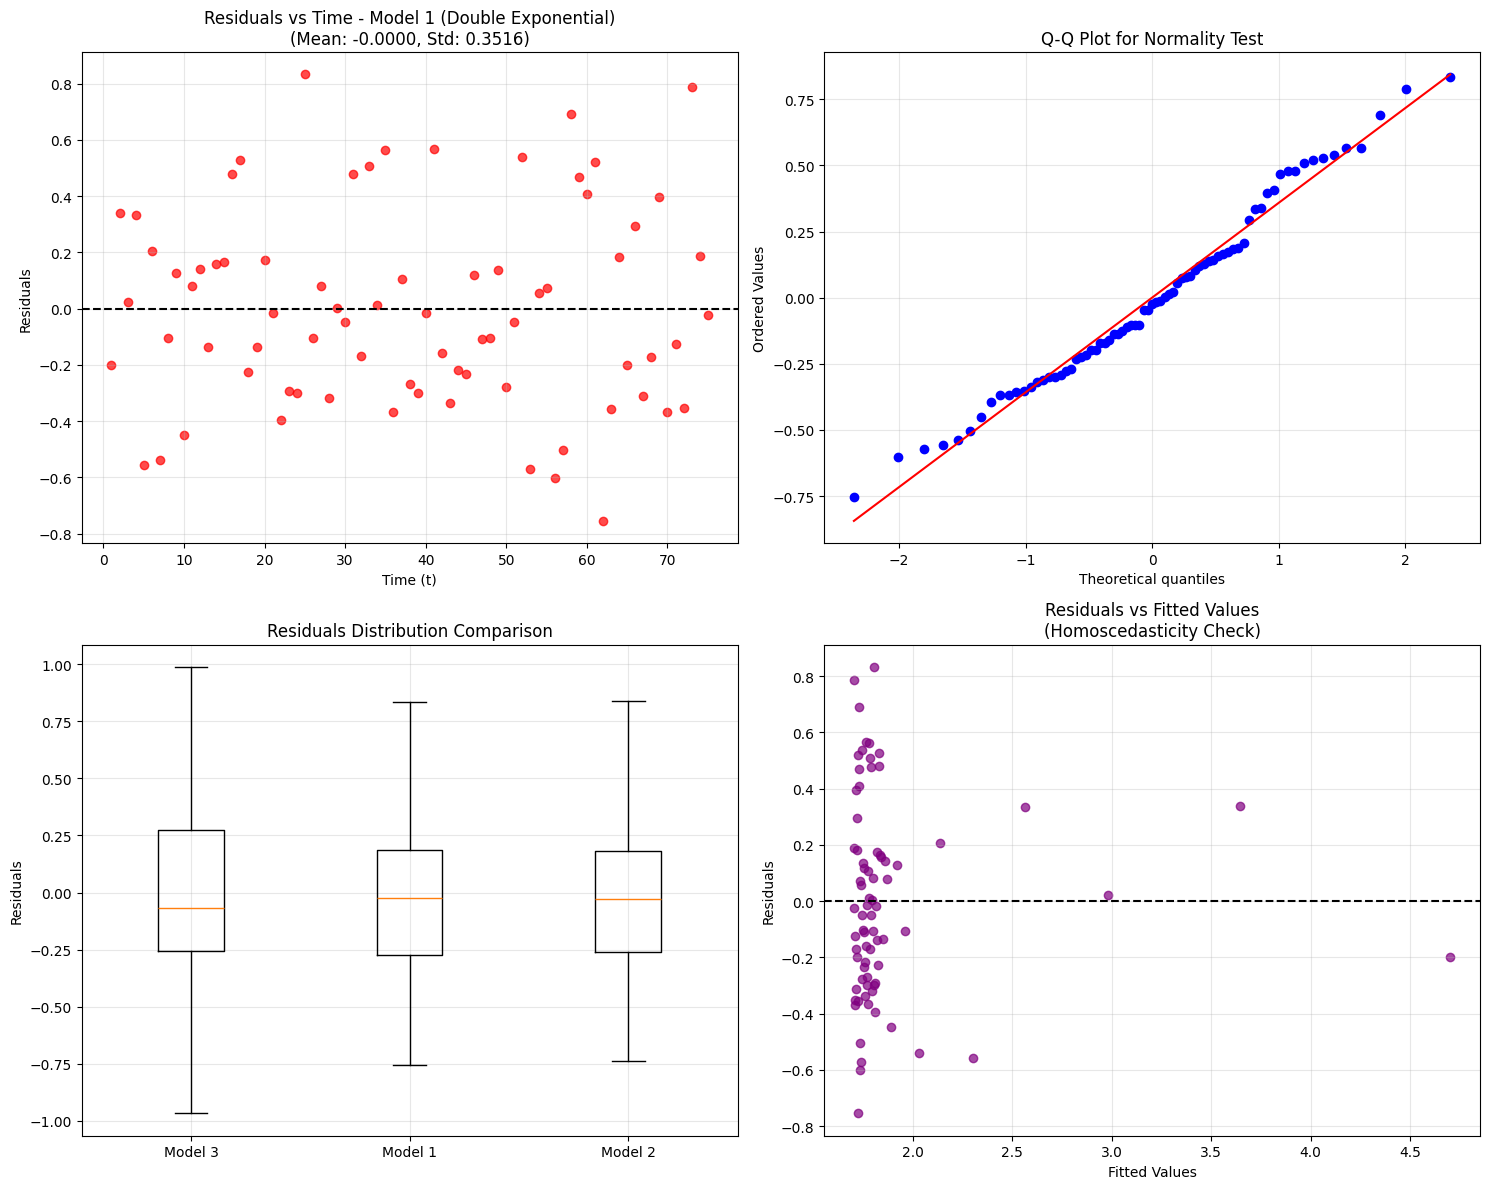


Generating performance metrics plot...


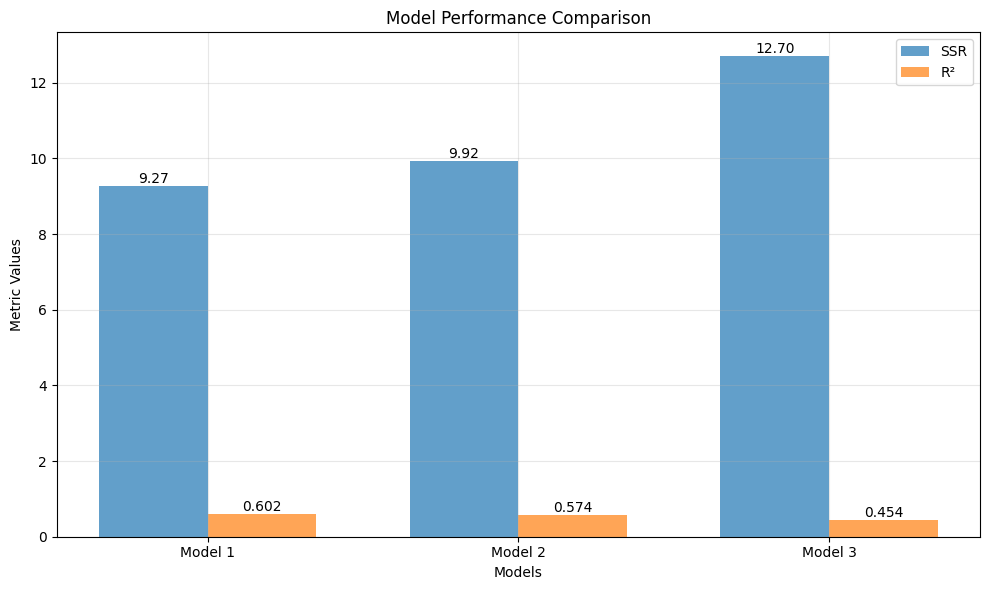


Generating standalone Q-Q plot for report...


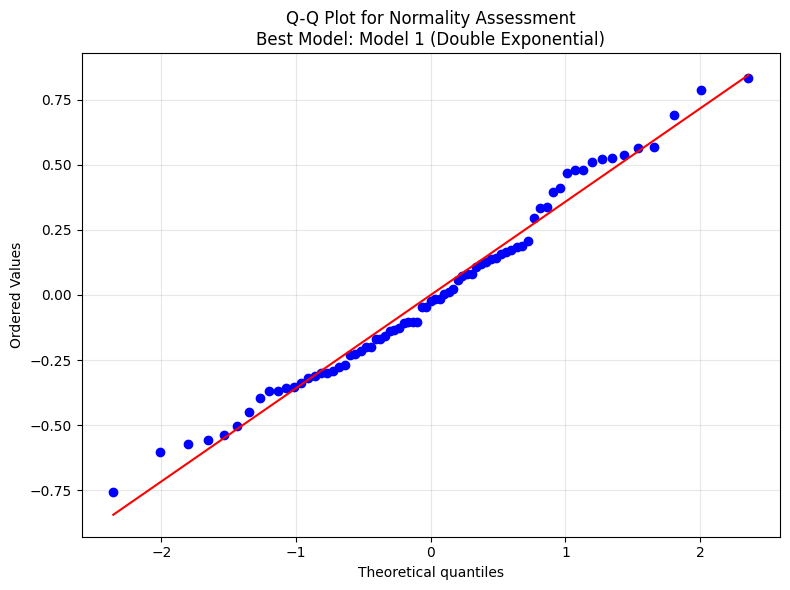


FINAL REPORT SUMMARY

1. BEST FITTED MODEL: Model 1 (Double Exponential)
   Sum of Squared Residuals: 9.2721
   R-squared: 0.6016
   Estimate of σ²: 0.1325

2. FITTING METHODOLOGY:
   - Model 3: Linear least squares (polynomial regression)
   - Model 1 & 2: Nonlinear least squares (Gauss-Newton algorithm)
   - Initial guesses based on data characteristics
   - Confidence intervals from Fisher information matrix

3. RESIDUAL ANALYSIS:
   Residual mean: -0.000000 (should be near 0)
   Residual std: 0.351608

4. MODEL RANKING (by SSR):
   1. Model 1 (Double Exponential)   SSR: 9.2721 *** BEST ***
   2. Model 2 (Rational Function)    SSR: 9.9245
   3. Model 3 (Polynomial)           SSR: 12.6976


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = np.array([
    [1, 4.50311899], [2, 3.98364544], [3, 3.00376034], [4, 2.89721894], [5, 1.74236655],
    [6, 2.34049749], [7, 1.48989713], [8, 1.85655808], [9, 2.04492188], [10, 1.44008315],
    [11, 1.94928944], [12, 1.99875140], [13, 1.71241128], [14, 1.99854600], [15, 2.00030899],
    [16, 2.31040192], [17, 2.35407066], [18, 1.59829235], [19, 1.68261063], [20, 1.99156058],
    [21, 1.79815257], [22, 1.41630387], [23, 1.51686847], [24, 1.50598013], [25, 2.63570428],
    [26, 1.69596028], [27, 1.87854838], [28, 1.47571826], [29, 1.79600239], [30, 1.74251151],
    [31, 2.26615930], [32, 1.61503768], [33, 2.29125857], [34, 1.79277527], [35, 2.34181881],
    [36, 1.40862608], [37, 1.87920976], [38, 1.50241542], [39, 1.46874177], [40, 1.75239646],
    [41, 2.33153248], [42, 1.60274529], [43, 1.42367530], [44, 1.54113889], [45, 1.52318716],
    [46, 1.87180793], [47, 1.64256823], [48, 1.64569366], [49, 1.88447428], [50, 1.46850038],
    [51, 1.69590259], [52, 2.27928638], [53, 1.16821539], [54, 1.79368901], [55, 1.80878043],
    [56, 1.13298929], [57, 1.22815967], [58, 2.42064857], [59, 2.19717073], [60, 2.13546276],
    [61, 2.24542212], [62, 0.96866733], [63, 1.36632836], [64, 1.90313268], [65, 1.51926875],
    [66, 2.01092672], [67, 1.40330076], [68, 1.54286683], [69, 2.10767889], [70, 1.34162271],
    [71, 1.58342659], [72, 1.35484242], [73, 2.49355912], [74, 1.89271724], [75, 1.68003488]
])

t = data[:, 0]
y = data[:, 1]

print("Data Summary:")
print(f"Number of observations: {len(t)}")
print(f"Time range: {t[0]} to {t[-1]}")
print(f"y range: {y.min():.3f} to {y.max():.3f}")
print(f"y mean: {y.mean():.3f}, std: {y.std():.3f}")

# Model Definitions and Fitting Functions
def model1(params, t):
    alpha0, alpha1, beta1, alpha2, beta2 = params
    return alpha0 + alpha1 * np.exp(beta1 * t) + alpha2 * np.exp(beta2 * t)

def residual_model1(params, t, y):
    return model1(params, t) - y

def model2(params, t):
    alpha0, alpha1, beta0, beta1 = params
    return (alpha0 + alpha1 * t) / (beta0 + beta1 * t)

def residual_model2(params, t, y):
    return model2(params, t) - y

def model3(params, t):
    beta0, beta1, beta2, beta3, beta4 = params
    return beta0 + beta1*t + beta2*t**2 + beta3*t**3 + beta4*t**4

def residual_model3(params, t, y):
    return model3(params, t) - y

def calculate_confidence_intervals(result, sigma2_hat, alpha=0.05):
    """Calculate confidence intervals using Fisher information matrix"""
    jacobian = result.jac
    n, p = jacobian.shape

    fisher_info = jacobian.T @ jacobian

    try:
        cov_matrix = sigma2_hat * np.linalg.inv(fisher_info)
        se = np.sqrt(np.diag(cov_matrix))
        t_val = stats.t.ppf(1 - alpha/2, n - p)
        ci_lower = result.x - t_val * se
        ci_upper = result.x + t_val * se
        return se, ci_lower, ci_upper
    except:
        return None, None, None

# Fit Model 3: Polynomial Regression
print("\n" + "="*50)
print("FITTING MODEL 3: POLYNOMIAL REGRESSION")
print("="*50)
initial_guess_model3 = [1, 0, 0, 0, 0]
result_model3 = opt.least_squares(residual_model3, initial_guess_model3, args=(t, y))
params_model3 = result_model3.x
y_pred_model3 = model3(params_model3, t)
ssr_model3 = np.sum(residual_model3(params_model3, t, y)**2)
mse_model3 = mean_squared_error(y, y_pred_model3)
print(f"Parameters: β0={params_model3[0]:.4f}, β1={params_model3[1]:.4f}, β2={params_model3[2]:.4f}, "
      f"β3={params_model3[3]:.4f}, β4={params_model3[4]:.4f}")
print(f"Sum of Squared Residuals: {ssr_model3:.4f}")
print(f"Mean Squared Error: {mse_model3:.4f}")
print(f"R²: {r2_score(y, y_pred_model3):.4f}")

# Fit Model 1: Double Exponential
print("\n" + "="*50)
print("FITTING MODEL 1: DOUBLE EXPONENTIAL")
print("="*50)
initial_guess_model1 = [2, 1, -0.1, 1, -0.2]
try:
    result_model1 = opt.least_squares(residual_model1, initial_guess_model1, args=(t, y),
                                     bounds=([-10, -10, -10, -10, -10], [10, 10, 0, 10, 0]))
    params_model1 = result_model1.x
    y_pred_model1 = model1(params_model1, t)
    ssr_model1 = np.sum(residual_model1(params_model1, t, y)**2)
    mse_model1 = mean_squared_error(y, y_pred_model1)
    print(f"Parameters: α0={params_model1[0]:.4f}, α1={params_model1[1]:.4f}, β1={params_model1[2]:.4f}, "
          f"α2={params_model1[3]:.4f}, β2={params_model1[4]:.4f}")
    print(f"Sum of Squared Residuals: {ssr_model1:.4f}")
    print(f"Mean Squared Error: {mse_model1:.4f}")
    print(f"R²: {r2_score(y, y_pred_model1):.4f}")
except Exception as e:
    print(f"Model 1 fitting failed: {e}")
    ssr_model1 = np.inf
    y_pred_model1 = None

# Fit Model 2: Rational Function
print("\n" + "="*50)
print("FITTING MODEL 2: RATIONAL FUNCTION")
print("="*50)
initial_guess_model2 = [3, -0.1, 1, 0.1]
try:
    result_model2 = opt.least_squares(residual_model2, initial_guess_model2, args=(t, y),
                                     bounds=([-10, -10, 0.1, -10], [10, 10, 10, 10]))
    params_model2 = result_model2.x
    y_pred_model2 = model2(params_model2, t)
    ssr_model2 = np.sum(residual_model2(params_model2, t, y)**2)
    mse_model2 = mean_squared_error(y, y_pred_model2)
    print(f"Parameters: α0={params_model2[0]:.4f}, α1={params_model2[1]:.4f}, "
          f"β0={params_model2[2]:.4f}, β1={params_model2[3]:.4f}")
    print(f"Sum of Squared Residuals: {ssr_model2:.4f}")
    print(f"Mean Squared Error: {mse_model2:.4f}")
    print(f"R²: {r2_score(y, y_pred_model2):.4f}")
except Exception as e:
    print(f"Model 2 fitting failed: {e}")
    ssr_model2 = np.inf
    y_pred_model2 = None

# Model Comparison
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
models_ssr = {
    'Model 1 (Double Exponential)': ssr_model1,
    'Model 2 (Rational Function)': ssr_model2,
    'Model 3 (Polynomial)': ssr_model3
}

best_model_name = min(models_ssr, key=models_ssr.get)
best_ssr = models_ssr[best_model_name]

for model_name, ssr in models_ssr.items():
    print(f"{model_name}: SSR = {ssr:.4f}")
print(f"\nBEST MODEL: {best_model_name}")

# Determine best model parameters
n = len(t)
if best_model_name == 'Model 1 (Double Exponential)':
    p = 5
    best_params = params_model1
    best_pred = y_pred_model1
    best_result = result_model1
    param_names = ['α0', 'α1', 'β1', 'α2', 'β2']
elif best_model_name == 'Model 2 (Rational Function)':
    p = 4
    best_params = params_model2
    best_pred = y_pred_model2
    best_result = result_model2
    param_names = ['α0', 'α1', 'β0', 'β1']
else:
    p = 5
    best_params = params_model3
    best_pred = y_pred_model3
    best_result = result_model3
    param_names = ['β0', 'β1', 'β2', 'β3', 'β4']

# Estimate sigma^2
sigma2_hat = best_ssr / (n - p)
print(f"\nEstimate of σ²: {sigma2_hat:.4f}")

# Confidence Intervals
print(f"\n" + "="*50)
print(f"CONFIDENCE INTERVALS FOR {best_model_name}")
print("="*50)
se, ci_lower, ci_upper = calculate_confidence_intervals(best_result, sigma2_hat)
if se is not None:
    for i, name in enumerate(param_names):
        print(f"{name}: {best_params[i]:.4f} ± {se[i]:.4f} "
              f"(95% CI: [{ci_lower[i]:.4f}, {ci_upper[i]:.4f}])")

# Residual Analysis for best model
residuals = y - best_pred
print(f"\n" + "="*50)
print("RESIDUAL ANALYSIS FOR BEST MODEL")
print("="*50)
print(f"Mean of residuals: {residuals.mean():.6f}")
print(f"Standard deviation of residuals: {residuals.std():.6f}")



# =============================================================================
# COMPREHENSIVE PLOTTING SECTION
# =============================================================================

# Plot 1: Individual Model Fits (3x1 subplot)
print("\nGenerating individual model plots...")
fig1, axes1 = plt.subplots(3, 1, figsize=(12, 15))

# Model 1 Plot
axes1[0].scatter(t, y, alpha=0.6, label='Observed data', color='blue')
if y_pred_model1 is not None:
    axes1[0].plot(t, y_pred_model1, 'r-', linewidth=2, label='Fitted Model 1')
    axes1[0].fill_between(t, y_pred_model1 - residuals.std(), y_pred_model1 + residuals.std(),
                         alpha=0.2, color='red', label='±1 std dev')
axes1[0].set_xlabel('Time (t)')
axes1[0].set_ylabel('y(t)')
axes1[0].set_title('Model 1: Double Exponential Fit\n'
                  f'SSR = {ssr_model1:.4f}, R² = {r2_score(y, y_pred_model1) if y_pred_model1 is not None else 0:.4f}')
axes1[0].legend()
axes1[0].grid(True, alpha=0.3)

# Model 2 Plot
axes1[1].scatter(t, y, alpha=0.6, label='Observed data', color='blue')
if y_pred_model2 is not None:
    axes1[1].plot(t, y_pred_model2, 'g-', linewidth=2, label='Fitted Model 2')
    axes1[1].fill_between(t, y_pred_model2 - residuals.std(), y_pred_model2 + residuals.std(),
                         alpha=0.2, color='green', label='±1 std dev')
axes1[1].set_xlabel('Time (t)')
axes1[1].set_ylabel('y(t)')
axes1[1].set_title('Model 2: Rational Function Fit\n'
                  f'SSR = {ssr_model2:.4f}, R² = {r2_score(y, y_pred_model2) if y_pred_model2 is not None else 0:.4f}')
axes1[1].legend()
axes1[1].grid(True, alpha=0.3)

# Model 3 Plot
axes1[2].scatter(t, y, alpha=0.6, label='Observed data', color='blue')
axes1[2].plot(t, y_pred_model3, 'purple', linewidth=2, label='Fitted Model 3')
axes1[2].fill_between(t, y_pred_model3 - residuals.std(), y_pred_model3 + residuals.std(),
                     alpha=0.2, color='purple', label='±1 std dev')
axes1[2].set_xlabel('Time (t)')
axes1[2].set_ylabel('y(t)')
axes1[2].set_title('Model 3: Polynomial Fit\n'
                  f'SSR = {ssr_model3:.4f}, R² = {r2_score(y, y_pred_model3):.4f}')
axes1[2].legend()
axes1[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('individual_model_fits.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Model Comparison (All models together)
print("\nGenerating model comparison plot...")
fig2, ax2 = plt.subplots(figsize=(12, 8))

ax2.scatter(t, y, alpha=0.7, label='Observed data', color='black', s=30)

if y_pred_model1 is not None:
    ax2.plot(t, y_pred_model1, 'r-', linewidth=2, label=f'Model 1 (SSR: {ssr_model1:.2f})')
if y_pred_model2 is not None:
    ax2.plot(t, y_pred_model2, 'g-', linewidth=2, label=f'Model 2 (SSR: {ssr_model2:.2f})')
ax2.plot(t, y_pred_model3, 'b-', linewidth=2, label=f'Model 3 (SSR: {ssr_model3:.2f})')

ax2.set_xlabel('Time (t)')
ax2.set_ylabel('y(t)')
ax2.set_title('Comparison of All Three Models')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Residuals Analysis with Q-Q Plot
print("\nGenerating residuals analysis with Q-Q plot...")
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))

# Best model residuals vs time
axes3[0,0].scatter(t, residuals, alpha=0.7, color='red')
axes3[0,0].axhline(y=0, color='black', linestyle='--')
axes3[0,0].set_xlabel('Time (t)')
axes3[0,0].set_ylabel('Residuals')
axes3[0,0].set_title(f'Residuals vs Time - {best_model_name}\n(Mean: {residuals.mean():.4f}, Std: {residuals.std():.4f})')
axes3[0,0].grid(True, alpha=0.3)

# Q-Q Plot for normality
stats.probplot(residuals, dist="norm", plot=axes3[0,1])
axes3[0,1].set_title(f'Q-Q Plot for Normality Test')
axes3[0,1].grid(True, alpha=0.3)

# All models residuals comparison
residuals_model3 = y - y_pred_model3
if y_pred_model1 is not None:
    residuals_model1 = y - y_pred_model1
if y_pred_model2 is not None:
    residuals_model2 = y - y_pred_model2

residual_data = [residuals_model3]
labels = ['Model 3']
colors = ['blue']

if y_pred_model1 is not None:
    residual_data.append(residuals_model1)
    labels.append('Model 1')
    colors.append('red')
if y_pred_model2 is not None:
    residual_data.append(residuals_model2)
    labels.append('Model 2')
    colors.append('green')

axes3[1,0].boxplot(residual_data, labels=labels)
axes3[1,0].set_ylabel('Residuals')
axes3[1,0].set_title('Residuals Distribution Comparison')
axes3[1,0].grid(True, alpha=0.3)

# Residuals vs Fitted values for best model
axes3[1,1].scatter(best_pred, residuals, alpha=0.7, color='purple')
axes3[1,1].axhline(y=0, color='black', linestyle='--')
axes3[1,1].set_xlabel('Fitted Values')
axes3[1,1].set_ylabel('Residuals')
axes3[1,1].set_title('Residuals vs Fitted Values\n(Homoscedasticity Check)')
axes3[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Performance Metrics Comparison
print("\nGenerating performance metrics plot...")
fig4, ax4 = plt.subplots(figsize=(10, 6))

models = ['Model 1', 'Model 2', 'Model 3']
ssr_values = [ssr_model1, ssr_model2, ssr_model3]
r2_values = [r2_score(y, y_pred_model1) if y_pred_model1 is not None else 0,
             r2_score(y, y_pred_model2) if y_pred_model2 is not None else 0,
             r2_score(y, y_pred_model3)]

x = np.arange(len(models))
width = 0.35

bars1 = ax4.bar(x - width/2, ssr_values, width, label='SSR', alpha=0.7)
bars2 = ax4.bar(x + width/2, r2_values, width, label='R²', alpha=0.7)

ax4.set_xlabel('Models')
ax4.set_ylabel('Metric Values')
ax4.set_title('Model Performance Comparison')
ax4.set_xticks(x)
ax4.set_xticklabels(models)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('performance_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 5: Standalone Q-Q Plot for Report
print("\nGenerating standalone Q-Q plot for report...")
fig5, ax5 = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax5)
ax5.set_title(f'Q-Q Plot for Normality Assessment\nBest Model: {best_model_name}')
ax5.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('qq_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Final Summary
print("\n" + "="*60)
print("FINAL REPORT SUMMARY")
print("="*60)
print(f"\n1. BEST FITTED MODEL: {best_model_name}")
print(f"   Sum of Squared Residuals: {best_ssr:.4f}")
print(f"   R-squared: {r2_score(y, best_pred):.4f}")
print(f"   Estimate of σ²: {sigma2_hat:.4f}")

print(f"\n2. FITTING METHODOLOGY:")
print("   - Model 3: Linear least squares (polynomial regression)")
print("   - Model 1 & 2: Nonlinear least squares (Gauss-Newton algorithm)")
print("   - Initial guesses based on data characteristics")
print("   - Confidence intervals from Fisher information matrix")

print(f"\n3. RESIDUAL ANALYSIS:")
print(f"   Residual mean: {residuals.mean():.6f} (should be near 0)")
print(f"   Residual std: {residuals.std():.6f}")


print(f"\n4. MODEL RANKING (by SSR):")
sorted_models = sorted(models_ssr.items(), key=lambda x: x[1])
for i, (model, ssr) in enumerate(sorted_models):
    best_indicator = " *** BEST ***" if model == best_model_name else ""
    print(f"   {i+1}. {model:30} SSR: {ssr:.4f}{best_indicator}")
